In [1]:
from matplotlib import pyplot as plt
import warnings
import osmnx as ox

#loc, name = (52.496, 13.467), 'stralau'
#loc, name = (43.208, 2.360), 'carccassone'
loc, name = (43.09485664321999, -0.049588680267333984), 'lourdes'
#loc, name = (50.917712685414976, 14.153845310211182), 'bad schandau'
radius = 1000

# Retrieve Buildings

In [2]:
warnings.filterwarnings('ignore')
building_tags = {'building': True}
buildings = ox.geometries_from_point(loc, building_tags, dist=radius)

# Retrieve Green Areas

In [3]:
warnings.filterwarnings('ignore')
green_tags = {'landuse': ['grass', 'forest'], 'natural': ['island', 'wood'], 'leisure': 'park'}
greens = ox.geometries_from_point(loc, green_tags, dist=radius)

In [4]:
greens.head(1)

,,source,geometry,access,nodes,landuse,leisure,name,leaf_type,natural,ways,type
element_type,osmid,,,,,,,,,,,
way,39814121,"GPS Trace, Survey","POLYGON ((-0.05540 43.09771, -0.05540 43.09769...",NaN,"[8979877948, 8979877949, 477233782, 2012049480...",grass,NaN,NaN,NaN,NaN,NaN,NaN


# Retrieve Water Areas

In [5]:
warnings.filterwarnings('ignore')
water_tags = {'natural': ['water', 'bay']}
water = ox.geometries_from_point(loc, water_tags, dist=radius)

# Retrieve Street Graphs

In [6]:
warnings.filterwarnings('ignore')
graph = ox.graph_from_point(loc, dist=radius);
streets = ox.graph_to_gdfs(graph, nodes=False)

In [7]:
streets.head(1)

,,,osmid,lanes,ref,name,highway,maxspeed,oneway,length,width,geometry,bridge,service,access,tunnel,junction
u,v,key,,,,,,,,,,,,,,,
34982668,671053035,0,286750193,2,D 914,Avenue Francis Lagardère,secondary,50,False,12.132,NaN,"LINESTRING (-0.04613 43.08939, -0.04613 43.08928)",NaN,NaN,NaN,NaN,NaN


# Retrieve Bridges

In [8]:
warnings.filterwarnings('ignore')
bridge_tags = {'bridge:structure': True}
bridges = ox.geometries_from_point(loc, bridge_tags, dist=radius)

# Split Buildings in 3 Buckets

Split by `osmid` (second level in multi index).

In [9]:
buildings_1 = buildings.iloc[lambda x: x.index.get_level_values(1) % 3 == 0]
buildings_2 = buildings.iloc[lambda x: x.index.get_level_values(1) % 3 == 1]
buildings_3 = buildings.iloc[lambda x: x.index.get_level_values(1) % 3 == 2]

# Plotting

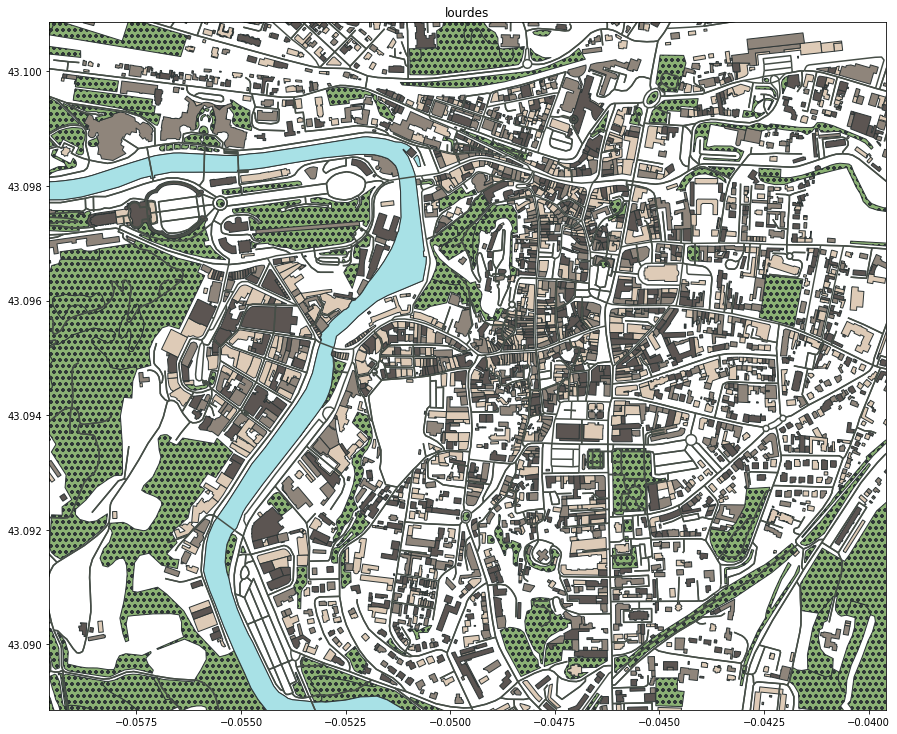

In [11]:
plt.rcParams['figure.figsize'] = [12, 12]
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_title(name)
fig.set_size_inches(15, 15)

ax.set_xlim([loc[1]-0.01, loc[1]+0.01])
ax.set_ylim([loc[0]-0.006, loc[0]+0.006])

x_colors = {
    'building': ('#ffd3b6', '#ffaaa5', '#ff8b94'),
    'street': '#2f3737',
    'green': '#dcedc1',
    'water': '#84e3c8',
    'bridge': '#dcedc1',
    'border': '#2f3737',
}

y_colors = {
    'building': ('#DECBB7', '#8F857B', '#5C5552'),
    'street': '#464E47',
    'green': '#8BB174',
    'water': '#A8E1E6',
    'bridge': '#8E9AAf',
    'border': '#2f3737',
}

colors = y_colors

streets.plot(ax=ax, color=colors['street'])
buildings_1.plot(ax=ax, fc=colors['building'][0], ec=colors['border'])
buildings_2.plot(ax=ax, fc=colors['building'][1], ec=colors['border'])
buildings_3.plot(ax=ax, fc=colors['building'][2], ec=colors['border'])
greens.plot(ax=ax, fc=colors['green'], hatch='oo..', ec=colors['border'])
water.plot(ax=ax, fc=colors['water'], ec=colors['border'])
if not bridges.empty:
    bridges.plot(ax=ax, fc=colors['bridge'], ec=colors['border'])

In [18]:
ax.set_axis_off()
ax.set_title(None)
fig.savefig('images/{}.jpg'.format(name), dpi=150, bbox_inches='tight', pad_inches=0)